# Data Scientist Challenge - LATAM Airlines

## Instrucciones

En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el manejo adecuado de git. Este desafío deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar. Lo que buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio
portafolio.

Instrucciones Git:
1) Crear un repositorio en la plataforma de git que más te acomode y que sea pública
2) Haber trabajado con una rama principal y otra de desarrollo. Opcional, ocupar alguna práctica de desarrollo de GitFlow.
Instrucciones del desafío:
1) Debes enviar el link al repositorio al mail del que fuiste contactado con asunto Challenge Data Scientist - [Nombre][Apellido], ejemplo Challenge Data Scientist - Pedro Pica Piedra.
2) Se aceptará los cambios en el repositorio hasta la fecha y hora que se indique en el mail.
3) En la siguiente carpeta de Google Drive encontrarás las instrucciones del desafío y el archivo `dataset_SCL.csv` que utilizarás para desarrollarlo.
4) El repositorio debe tener un jupyter notebook llamado solution.ipynb utilizando python 3. No serán revisados otros
lenguajes como R o similar.
5) En solution.ipynb deben estar resueltas las respuestas a todas las preguntas del desafío
6) Dentro del repositorio deben estar todos los archivos necesarios para que los evaluadores puedan clonar y luego correr tu
notebook sin problemas
7) Una copia de tu CV (curriculum vitae) en formato .pdf en el repositorio



## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

Fecha-I : Fecha y hora programada del vuelo.

Vlo-I : Número de vuelo programado.

Ori-I : Código de ciudad de origen programado.

Des-I : Código de ciudad de destino programado.

Emp-I : Código aerolínea de vuelo programado.

Fecha-O : Fecha y hora de operación del vuelo.

Vlo-O : Número de vuelo de operación del vuelo.

Ori-O : Código de ciudad de origen de operación

Des-O : Código de ciudad de destino de operación.

Emp-O : Código aerolínea de vuelo operado.

DIA : Día del mes de operación del vuelo.

MES : Número de mes de operación del vuelo.

AÑO : Año de operación del vuelo.

DIANOM : Día de la semana de operación del vuelo.

TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

OPERA : Nombre de aerolínea que opera.

SIGLAORI : Nombre ciudad origen.

SIGLADES : Nombre ciudad destino.

### Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?
Aspectos a considerar
Orden y claridad al momento de plantear un análisis, idea, código, etc.
Creatividad para resolver el desafío.
Código versionado en Git.
No vamos a revisar excel, macros, códigos en R.
No vamos a revisar desafíos que no lleguen en la fecha indicada
Ante cualquier duda, deja explícitos tus supuestos
No vivimos en tu cabeza, trata de expresarte lo mejor posible para explicar tus decisiones y respuestas

## Paso 1: Lectura

In [1]:
# importamos librerías importantes para la tarea 
import pandas as pd
import os

In [2]:
# leemos la base cruda con pandas
raw = pd.read_csv('dataset_SCL.csv',
                  dtype={'Fecha-I':'str',
                         'Vlo-I':'str',
                         'Ori-I':'str',
                         'Des-I':'str',
                         'Emp-I':'str',
                         'Fecha-O':'str',
                         'Vlo-O':'str'})  # da algunos problemas porque Vlo-I parecía ser numérico pero no lo es. Ej: "405A"

In [3]:
# raw = pd.read_csv('dataset_SCL.csv')

In [4]:
# nuestra lectura de datos es un dataframe?
isinstance(raw, pd.DataFrame)

True

In [5]:
# Sí lo es, pues lo leímos read_csv de pandas que la transforma en dataframe, luego:
df = raw

## Paso 2: Exploración

In [6]:
# Tenemos 18 variables predictoras X1..X18 para nuestra variable respuesta Y (que, sospecho, debe ser la dif entre Fecha-I y Fecha-O)
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [8]:
# vamos a mirar unos primeros valores del df
df.head(n=100)

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0   2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1   2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2   2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3   2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4   2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   
..                  ...   ...   ...   ...   ...                  ...   ...   
95  2017-01-17 13:35:00    92  SCEL  SAEZ   ACA  2017-01-17 14:23:00    92   
96  2017-01-18 13:35:00    92  SCEL  SAEZ   ACA  2017-01-18 13:41:00    92   
97  2017-01-19 13:35:00    92  SCEL  SAEZ   ACA  2017-01-19 13:37:00    92   
98  2017-01-20 13:35:00    92  SCEL  SAEZ   ACA  2017-01-20 14:03:00    92   
99  2017-01-21 13:35:00    92  SCEL  SAEZ   ACA  2017-01-21 13:46:00    92   

   Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0   SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1   SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2   SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3   SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4   SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   
..   ...   ...   ...  ...  ...   ...        ...       ...                ...   
95  SCEL  SAEZ   ACA   17    1  2017     Martes         I         Air Canada   
96  SCEL  SAEZ   ACA   18    1  2017  Miercoles         I         Air Canada   
97  SCEL  SAEZ   ACA   19    1  2017     Jueves         I         Air Canada   
98  SCEL  SAEZ   ACA   20    1  2017    Viernes         I         Air Canada   
99  SCEL  SAEZ   ACA   21    1  2017     Sabado         I         Air Canada   

    SIGLAORI      SIGLADES  
0   Santiago         Miami  
1   Santiago         Miami  
2   Santiago         Miami  
3   Santiago         Miami  
4   Santiago         Miami  
..       ...           ...  
95  Santiago  Buenos Aires  
96  Santiago  Buenos Aires  
97  Santiago  Buenos Aires  
98  Santiago  Buenos Aires  
99  Santiago  Buenos Aires  

[100 rows x 18 columns]

In [9]:
# algunas estadísticas descriptivas
df.describe()
# no nos dice nada pq lo único numérico hasta ahora son DIA MES AÑO

DIA           MES           AÑO
count  68206.000000  68206.000000  68206.000000
mean      15.714790      6.622585   2017.000029
std        8.782886      3.523321      0.005415
min        1.000000      1.000000   2017.000000
25%        8.000000      3.000000   2017.000000
50%       16.000000      7.000000   2017.000000
75%       23.000000     10.000000   2017.000000
max       31.000000     12.000000   2018.000000

## Paso 3: Pre-procesamiento de Valores faltantes y extremos

In [10]:
# importamos el módulo ML necesario
from sklearn import preprocessing

In [11]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Tenemos suerte, sólo la columna Vlo-O tiene un espacio en blanco que presumiblemente sería un número: 200.

Supuesto: Dado que Vlo-I es también 200. Podemos quitar la linea completa o bien extrapolarlo. Es razonable llenar el dato faltante.


In [12]:
# Hay un dato faltante en la fila 6068 de la columna Vlo-O 
df.at[6068, 'Vlo-O']

nan

In [13]:
# lo llenamos
df.at[6068, 'Vlo-O'] = '200'

In [14]:
# lo revisamos
df.at[6068, 'Vlo-O']

'200'

In [15]:
# Luego ya no tenemos NANs
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [16]:
# df["date"] = df["Fecha-O"].astype("datetime64")
# df.groupby(df["date"].dt.month).count().plot(kind="bar")
# muy confuso, hagámoslo más sencillo.

<AxesSubplot:xlabel='OPERA'>

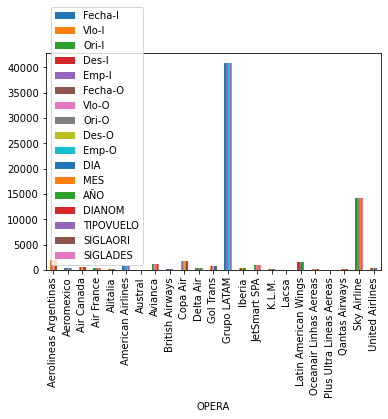

In [17]:
# Pequeño gráfico
df.groupby(df["OPERA"]).count().plot(kind="bar", )

In [18]:
# veamos la distribución de los vuelos
# quiero contar los vuelos Vlo-O, a través 2017
# luego, agrupados por Operador.

freqByDate = df.groupby(['AÑO', 'MES']).size() 
print(freqByDate)

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64


In [19]:
# Agregados por Operador de vuelo y ordenados.
freqByOp = df.groupby(['OPERA']).size()
freqByOp.sort_values(axis=0)

OPERA
Plus Ultra Lineas Aereas       49
Austral                        74
Lacsa                          92
Qantas Airways                195
British Airways               205
K.L.M.                        251
Alitalia                      259
Oceanair Linhas Aereas        279
United Airlines               335
Aeromexico                    351
Air France                    358
Delta Air                     358
Iberia                        362
Air Canada                    565
American Airlines             757
Gol Trans                     806
JetSmart SPA                 1095
Avianca                      1152
Latin American Wings         1674
Copa Air                     1850
Aerolineas Argentinas        1949
Sky Airline                 14298
Grupo LATAM                 40892
dtype: int64

Claramente Grupo Latam y Sky Airline tienen la mayor participación.

In [20]:
# Veremos distribuciones más adelante luego del Encoding.
# hist = df.hist(bins=20)

In [21]:
# Veamos los valores extremos
# No hay mucho outlier pues gran parte de la data es categórica (tranformaremos esto más adelante con Label_Encoding)
# Y, si bien, la distribución de operadores está concentrada en pocos, no se consideran outliers.

### Pregunta 1: ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

En una 1era mirada tenemos: 

Una ventana temporal de un año (2017) de datos de vuelos de distintos operadores. Hay 2 datos de Enero 2018 que pueden confundirse en Enero de 2017 si hacemos agregación por MES solamente, pero para temas de distribución lo omitiremos.

1. Fecha-I y Fecha-O tienen formato "m/d/aaaa hh:mm"
2. I: Programado, lo planeado.
3. O: Operación, lo que realmente ocurrio.

Llama la atención que falta un dato en el registro posición 6068, que está en blanco. Pero bajo el supuesto de que, salvo 120 casos, Vlo-I = Vlo-O, lo llenamos con el número 200.

También hay 3 columnas: ORI-I, ORI-O y SIGLAORI, que tienen 1 sólo dato único, las dropearemos más adelante porque aportan.

Mirando sólo descriptivamente la distribución de la cantidad de vuelos (operación) por fecha (agregación Año Mes) tenemos:

1. Se ve que la curva parte alta en Enero 2017 luego baja, supuestamente por temporada baja.
2. Se ve un peak en Julio, supuestamente vuelos internacionales que persiguen el calorcito de fin de año en el hemisferio Sur.
3. Hay otro peak en Septiembre, supuestamente por feriados alrededor del 18, porque parten a mitad de la 2da semana.
4. Se ve que desde Octubre 2017 vuelve a subir la curva hasta el máximo en Diciembre 2017, Navidad y verano en hemisferio Sur.

Me parece que habría que definir nuevas caracteristicas según lo solicitado, porque queremos modelar la diferencia entre las Fecha-I y Fecha-O, y en qué unidades medirlo. Definir también qué es un atraso. Además, según la distribución de vuelos en el año, podriamos decir algo sobre la temporada pues en verano (del hemisferio sur) hay una más vuelos que en invierno, hace sentido.

En el paso 4 vamos a definir lo que necesitemos.

## Paso 4: Definimos nuevas características

Definamos nuevas características (synthetic_features):

1. temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
2. dif_min: diferencia en minutos entre Fecha-O y Fecha-I .
3. atraso_15: 1 si dif_min > 15, 0 si no.
4. periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.



### 4.1. Definimos temporada_alta

In [22]:
# Se realizó 4.4.periodo_dia antes que 4.1.temporada_alta, pero son similares.
# Supuesto 1: Sin incluir extremos de las fechas.
# Supuesto 2: la condición (Fecha-I está entre 15-Dic y 3-Mar) supone que es antes de 3-Mar y después de 15-Dic,
# para que tenga sentido la condición. De otro modo, tendríamos que llamar temporada alta entre el 3-Mar a 15 Dic, lo cuál estaría erroneo.

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime

In [24]:
#cambiamos las fechas a objeto datatime
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

In [25]:
# Fecha-I es type object, lo pasaremos a datetime
df['Fecha-I']

0       2017-01-01 23:30:00
1       2017-01-02 23:30:00
2       2017-01-03 23:30:00
3       2017-01-04 23:30:00
4       2017-01-05 23:30:00
                ...        
68201   2017-12-22 14:55:00
68202   2017-12-25 14:55:00
68203   2017-12-27 14:55:00
68204   2017-12-29 14:55:00
68205   2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: datetime64[ns]

In [26]:
# Lo pasamos a datetime para poder compararlo más abajo en las condiciones
#df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')

In [27]:
df['Fecha-I']

0       2017-01-01 23:30:00
1       2017-01-02 23:30:00
2       2017-01-03 23:30:00
3       2017-01-04 23:30:00
4       2017-01-05 23:30:00
                ...        
68201   2017-12-22 14:55:00
68202   2017-12-25 14:55:00
68203   2017-12-27 14:55:00
68204   2017-12-29 14:55:00
68205   2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: datetime64[ns]

In [28]:
import numpy as np
import datetime
# extraemos la parte dia mes de la fecha 
dateI = df['Fecha-I'].dt.date
#time = df['Fecha-I'].dt.strftime('%H:%M')
#dateI = pd.to_datetime(dateI, format='%Y-%m-%d %H:%M:%S')
dateI

0        2017-01-01
1        2017-01-02
2        2017-01-03
3        2017-01-04
4        2017-01-05
            ...    
68201    2017-12-22
68202    2017-12-25
68203    2017-12-27
68204    2017-12-29
68205    2017-12-31
Name: Fecha-I, Length: 68206, dtype: object

In [29]:
# vemos que funcione la comparación
dateI > datetime.date(2017, 1, 2)

0        False
1        False
2         True
3         True
4         True
         ...  
68201     True
68202     True
68203     True
68204     True
68205     True
Name: Fecha-I, Length: 68206, dtype: bool

In [30]:
# usaremos np.select() igual que en 4.4.

In [31]:
# creamos la lista de condiciones
conditions = [
    (dateI < datetime.date(2017, 3,3)),       # está antes de 3-Mar
    (dateI > datetime.date(2017, 12, 15)),    # está después de 15-Dic 
    (dateI > datetime.date(2017, 7, 15)) & (dateI < datetime.date(2017, 7, 31)), # está entre 15-Jul y 31-Jul
    (dateI > datetime.date(2017, 9, 11)) & (dateI < datetime.date(2017, 9, 30))  # está entre 11-Sep y 30-Sep
    ]

In [32]:
# creamos la lista de valores para cada una de esas condiciones
values = ['1','1','1','1']

In [33]:
# creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos
df['temporada_alta'] = np.select(conditions, values)

In [34]:
df['temporada_alta'] = df['temporada_alta']*1           # transformar falsos a 0
df['temporada_alta'] = df['temporada_alta'].astype(int) # lo quiero int32 igual que atraso_15

In [35]:
# revisamos la columna para corroborar.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[['Fecha-I', 'temporada_alta']])

                  Fecha-I  temporada_alta
0     2017-01-01 23:30:00               1
1     2017-01-02 23:30:00               1
2     2017-01-03 23:30:00               1
3     2017-01-04 23:30:00               1
4     2017-01-05 23:30:00               1
5     2017-01-06 23:30:00               1
6     2017-01-07 23:30:00               1
7     2017-01-08 23:30:00               1
8     2017-01-09 23:30:00               1
9     2017-01-11 23:30:00               1
10    2017-01-14 23:30:00               1
11    2017-01-16 23:30:00               1
12    2017-01-18 23:30:00               1
13    2017-01-21 23:30:00               1
14    2017-01-23 23:30:00               1
15    2017-01-25 23:30:00               1
16    2017-01-28 23:30:00               1
17    2017-01-30 23:30:00               1
18    2017-01-01 22:00:00               1
19    2017-01-02 22:00:00               1
20    2017-01-03 22:00:00               1
21    2017-01-04 22:00:00               1
22    2017-01-05 22:00:00         

In [36]:
# también revisar que haya quedado con tipo int32 
df.info()
# Pasemos al siguiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

### 4.2. Definimos dif_min

In [37]:
# revisamos qué tipo de objeto son las fechas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [38]:
#cambiamos las fechas a objeto datatime
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

In [39]:
# revisamos que hayan cambiado a objeto tipo datatime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [40]:
# Luego de cambiar el tipo, hacemos diferencia de tiempo, medido en minutos
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

In [41]:
# Finalmente, queda definida la diferencia:
df['dif_min']
# los números positivos indica la cantidad de minutos de atraso.
# notar que un número negativo implica que el vuelo llegó antes de lo esperado.

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Name: dif_min, Length: 68206, dtype: float64

### 4.3. Definimos atraso_15

In [42]:
# vamos a definir un atraso cuando dif_min sean más de 15 min:

df['atraso_15'] = df['dif_min'] > 15 # def condición
df['atraso_15'] = df['atraso_15']*1  # convierte los falses en 0 y trues en 1

In [43]:
df['atraso_15']

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int32

### 4.4. Definimos periodo_dia

definimos: periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.

quiero extraer hh:mm de cada fecha, y hacer condiciones.
El pseudo sería algo así:

si (Fecha-I > 05:00) AND (Fecha-I < 11:59) then periodo_dia == "mañana"

si (Fecha-I > 12:00) AND (Fecha-I < 18:59) then periodo_dia == "tarde"

si (Fecha-I > 19:00) OR (Fecha-I < 04:59) then periodo_dia == "noche"




In [44]:
# if (df['Fecha-I'] > datetime.time(5, 00)) & (df['Fecha-I'] < datetime.time(11, 59)):
#    df['periodo_dia'] == "mañana"
    
# el problema acá es que datetime.time no es del mismo tipo que Fecha-I.
# pensemos... >>> 3 doritos después: podría ser con una lista de condiciones y usar np.select()

In [45]:
import numpy as np
from datetime import datetime
# extraemos la parte tiempo de la fecha 
time = df['Fecha-I'].dt.time
#time = df['Fecha-I'].dt.strftime('%H:%M')
time

0        23:30:00
1        23:30:00
2        23:30:00
3        23:30:00
4        23:30:00
           ...   
68201    14:55:00
68202    14:55:00
68203    14:55:00
68204    14:55:00
68205    14:55:00
Name: Fecha-I, Length: 68206, dtype: object

In [46]:
import datetime
# comparamos según el pseudo anterior:
time > datetime.time(19, 00)
# estos sí se pueden comparar

0         True
1         True
2         True
3         True
4         True
         ...  
68201    False
68202    False
68203    False
68204    False
68205    False
Name: Fecha-I, Length: 68206, dtype: bool

In [47]:
# creamos la lista de condiciones
conditions = [
    (time >= datetime.time(5, 00)) & (time <= datetime.time(11, 59)),
    (time >= datetime.time(12, 00)) & (time <= datetime.time(18, 59)),
    (time >= datetime.time(19, 00)),
    (time <= datetime.time(4, 59))
    ]

In [48]:
# creamos la lista de valores para cada una de esas condiciones
values = ['mañana', 'tarde', 'noche', 'noche']

In [49]:
# creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos
df['periodo_dia'] = np.select(conditions, values)

In [50]:
# revisamos la columna para corroborar. Hay 27 periodo_dia == 0, veamos por qué.
x = df.pivot_table(
    index=['periodo_dia'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# Aps, fue porque estaba todo con símbolos estrictos (<, >), se solucionó cuando colocamos = pues la comparación es al minuto.
# Solucionado, ahora ya no aparecen los ceros.

  periodo_dia      0     1
0      mañana  21294  4058
1       noche  13878  3470
2       tarde  20420  5086


## Paso 5: Exportamos las columnas creadas al archivo "synthetic_features.csv"

In [51]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

In [52]:
# exportamos las columnas a un csv en la misma carpeta, ordenados con el mismo índice que el dataset
export_columns = ['dif_min','atraso_15','periodo_dia','temporada_alta']
df.loc[:,export_columns].to_csv('synthetic_features.csv')


In [53]:
# si no se pueden nombrar
# export_columns = [19:22]
# df.iloc[:,export_columns].to_csv('new.csv')

## Paso 6: Preguntas
1. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
2. ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [54]:
# miremos el dataframe con los nuevos features
df.head()
# En mi opinión sería útil mirar esto con alguna herramienta de BI y visualización como PowerBI, se puede llegar a insights rápido y muchas veces sirven para elegir cómo modelar.

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

In [55]:
# Preguntémonos por: destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo
# Preguntémonos por: SIGLADES, OPERA, MES, DIANOM, temporada_alta, TIPOVUELO
# Hagamos las agregaciones para entender qué sucede:

In [56]:
By_SIGLADES = df.groupby(['atraso_15','SIGLADES']).size() 
# By_SIGLADES.sort_values(axis=0)
print(By_SIGLADES)

atraso_15  SIGLADES     
0          Antofagasta      4939
           Arica            2106
           Asuncion          166
           Atlanta           337
           Auckland N.Z.     226
                            ... 
1          Temuco            403
           Toronto            89
           Tucuman            10
           Ushuia              4
           Valdivia          117
Length: 117, dtype: int64


In [57]:
By_OPERA = df.groupby(['atraso_15','OPERA']).size()
# By_OPERA.sort_values(axis=0)
print(By_OPERA)

atraso_15  OPERA                   
0          Aerolineas Argentinas        1481
           Aeromexico                    341
           Air Canada                    307
           Air France                    328
           Alitalia                      230
           American Airlines             706
           Austral                        59
           Avianca                       846
           British Airways               176
           Copa Air                     1734
           Delta Air                     337
           Gol Trans                     519
           Grupo LATAM                 33586
           Iberia                        326
           JetSmart SPA                  899
           K.L.M.                        230
           Lacsa                          81
           Latin American Wings          993
           Oceanair Linhas Aereas        236
           Plus Ultra Lineas Aereas       19
           Qantas Airways                 82
           Sky Airl

In [58]:
By_DIANOM = df.groupby(['atraso_15','DIANOM']).size() 
# By_DIANOM.sort_values(axis=0)

In [59]:
By_MES = df.groupby(['atraso_15','MES']).size() # ordenado por mes
By_MES
# Hay una acumulación de atrasos en Jul, y Oct Nov y Dic

atraso_15  MES
0          1      5130
           2      4718
           3      4851
           4      4435
           5      4413
           6      4129
           7      4234
           8      4748
           9      4643
           10     4669
           11     4881
           12     4741
1          1       978
           2       843
           3       631
           4       585
           5       827
           6       852
           7      1758
           8       996
           9       967
           10     1363
           11     1199
           12     1615
dtype: int64

In [60]:
By_temporada_alta = df.groupby(['atraso_15','temporada_alta']).size() 
# By_temporada_alta.sort_values(axis=0)
print(By_temporada_alta)
# la mayor cantidad de atrasos ocurre en temporada baja, más del doble.

atraso_15  temporada_alta
0          0                 38086
           1                 17506
1          0                  8480
           1                  4134
dtype: int64


In [61]:
By_TIPOVUELO = df.groupby(['atraso_15','TIPOVUELO']).size() 
# By_TIPOVUELO.sort_values(axis=0)
print(By_TIPOVUELO)
# Los atrasos ocurren más en vuelos internacionales (7048, un 56% del total de atrasos)

atraso_15  TIPOVUELO
0          I            24192
           N            31400
1          I             7048
           N             5566
dtype: int64


In [62]:
# otra forma para ver multivariable TIPOVUELO, temporada_alta
# Aquí vemos distintas agregaciones de atraso_15, agrupado por temporada_alta agrupado y TIPOVUELO.

x = df.pivot_table(
    index=['temporada_alta', 'TIPOVUELO'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# Por ejemplo, vemos que la mayor cantidad de atrasos (4635, un 38% del total) ocurre en temporada baja en vuelos internacionales.
# También, que la menor cantidad de atrasos (1721, sólo 14% del total) ocurre en temporada alta en vuelos nacionales.

   temporada_alta TIPOVUELO      0     1
0               0         I  16725  4635
1               0         N  21361  3845
2               1         I   7467  2413
3               1         N  10039  1721


In [63]:
# otra forma para ver los atrasos por temporada_alta y DIANOM.
x = df.pivot_table(
    index=['temporada_alta','DIANOM'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# Vie, Lun y Jue hay más atrasos en temporada baja.
# Vie, Jue, Mar y Mie hay más atrasos en temporada alta. Aunque no hay mucha dif entre estos últimos.

    temporada_alta     DIANOM     0     1
0                0    Domingo  5535  1000
1                0     Jueves  5568  1411
2                0      Lunes  5624  1482
3                0     Martes  5528  1053
4                0  Miercoles  5459  1081
5                0     Sabado  4811   864
6                0    Viernes  5561  1589
7                1    Domingo  2683   578
8                1     Jueves  2638   634
9                1      Lunes  2459   566
10               1     Martes  2500   581
11               1  Miercoles  2602   580
12               1     Sabado  2178   499
13               1    Viernes  2446   696


In [64]:
# otra forma para ver los atrasos por TIPOVUELO, OPERA.
x = df.pivot_table(
    index=['TIPOVUELO','OPERA'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# tiene sentido porque también hay más operadores internacionales.

   TIPOVUELO                     OPERA      0     1
0          I     Aerolineas Argentinas   1481   468
1          I                Aeromexico    341    10
2          I                Air Canada    307   258
3          I                Air France    328    30
4          I                  Alitalia    230    29
5          I         American Airlines    706    51
6          I                   Austral     59    15
7          I                   Avianca    846   306
8          I           British Airways    176    29
9          I                  Copa Air   1734   116
10         I                 Delta Air    337    21
11         I                 Gol Trans    519   287
12         I               Grupo LATAM  13115  4034
13         I                    Iberia    326    36
14         I              JetSmart SPA      2     4
15         I                    K.L.M.    230    21
16         I                     Lacsa     81    11
17         I      Latin American Wings    550   488
18         I

In [65]:
# otra forma para ver los atrasos por TIPOVUELO, periodo_dia.
x = df.pivot_table(
    index=['TIPOVUELO','periodo_dia'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)

# tiene sentido porque también hay más operadores internacionales.

  TIPOVUELO periodo_dia      0     1
0         I      mañana   8022  2162
1         I       noche   8583  2174
2         I       tarde   7587  2712
3         N      mañana  13272  1896
4         N       noche   5295  1296
5         N       tarde  12833  2374


In [66]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

In [67]:
# probemos graficar df.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

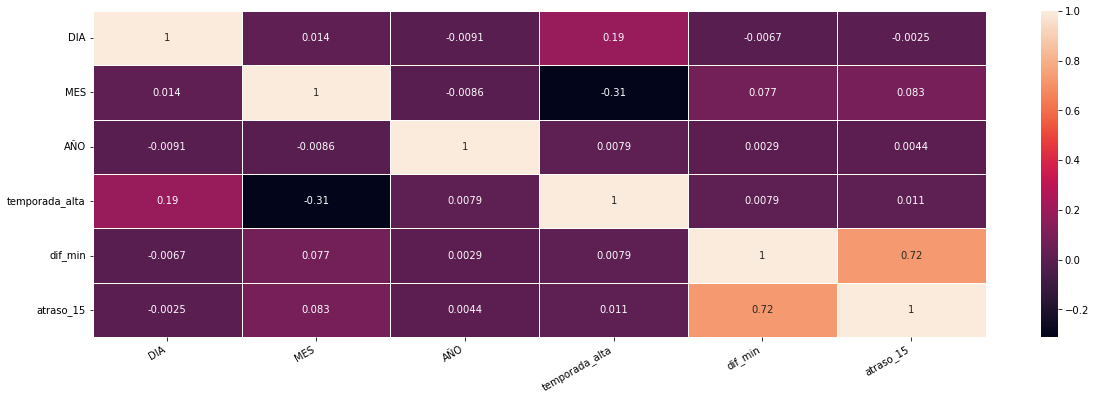

In [68]:
# La matriz de correlación sin Encoding luciría así:
df_corrmatrix = df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(df_corrmatrix, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Mirando la matrix del dataframe df sin Encoding, tenemos:
1. Hay una relación entre atraso_15 y df_min, pero la diferencia en minutos fue usada para construir atraso_15 que es nuestra variable respuesta (Y), por tanto obviamente mostrará fuerza (artificial) en su relación, no es lo que buscamos.
2. MES tiene algo de correlación (0.083) directa, pero no es suficiente.
3. Hay una relación artificial entre temporada_alta y DIA, por motivos de construcción. Tal como en 1.
4. Hay una relación artificial entre temporada_alta y MES, por motivos de construcción. Tal como en 1.

¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

La variable más influyente hasta ahora parece ser: MES

DE las variables sintéticas, la más influyente parece ser: dif_min, pero esta la usamos para construir atraso_15, así que no sirve.

Pero también parece razonable pensar que la hora de salida del vuelo tenga que ver con los retrasos.

También parece razonable pensar que los vuelos anteriores retrazan a los sucesivos.

Cabe la pregunta:
¿Existe relación entre la hora de salida de un vuelo y su retrasos?


In [69]:
# bueno para comparaciones.
# breakfast_time = now.replace( hour=7, minute=30, second=0, microsecond=0 )
# lunch_time = now.replace( hour=12, minute=30, second=0, microsecond=0 )
# coffee_break = now.replace( hour=16, minute=00, second=0, microsecond=0 )

# breakfast_time <= lunch_time <= coffee_break

In [70]:
# Útil
# df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')

In [71]:
# Útil
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# df
# df['Date'] = pd.date_range(start='01/01/2017', end='31/12/2017')
# df['Value'] = np.random.randint(low=5, high=100, size=len(df))
# df.set_index('Date', inplace=True)

# df.plot()
# plt.show()

# df.plot(kind='bar')
# plt.show()

## Paso 7: Label Encoding

Un poco más de pre-procesamiento, transformaremos las siguientes características a tipo numérico mediante Label_Encoding:

EMP-I, DES-O, EMP-O, DIANOM, TIPOVUELO, OPERA, SIGLADES, periodo_dia

Sabemos que EMP-O = OPERA.

In [72]:
# Para ello habrá que hacer un Label_Encoding. Quiero transformar en número algunas variables: 

In [73]:
# from sklearn.preprocessing import LabelEncoder
# le = preprocessing.LabelEncoder()

In [74]:
# df['label'] = le.fit_transform(df['label'])

In [75]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

In [77]:
# Limpiemos el dataframe un poco más, excluimos algunas columnas porque tienen 1 sólo valor único y no aportan.
# También excluiremos las fechas porque ya las compusimos en la feature dif_min.
# Quitaremos también AÑO (porque es casi solo 2017) y DIA porque ya compusimos 3 periodos del día
# Pero me quedaré con MES porque podemos aprovecharla como categórica.
import pandas as pd
#df2 = df.loc[:, ~df.columns.isin(['Ori-I', 'Ori-O', 'SIGLAORI'])]
df = df.drop(['Fecha-I','Fecha-O','Ori-I', 'Ori-O', 'SIGLAORI', 'DIA', 'AÑO'], axis=1)
print(df)

      Vlo-I Des-I Emp-I  Vlo-O Des-O Emp-O  MES     DIANOM TIPOVUELO  \
0       226  KMIA   AAL    226  KMIA   AAL    1    Domingo         I   
1       226  KMIA   AAL    226  KMIA   AAL    1      Lunes         I   
2       226  KMIA   AAL    226  KMIA   AAL    1     Martes         I   
3       226  KMIA   AAL    226  KMIA   AAL    1  Miercoles         I   
4       226  KMIA   AAL    226  KMIA   AAL    1     Jueves         I   
...     ...   ...   ...    ...   ...   ...  ...        ...       ...   
68201   400  SPJC   JAT  400.0  SPJC   JAT   12    Viernes         I   
68202   400  SPJC   JAT  400.0  SPJC   JAT   12      Lunes         I   
68203   400  SPJC   JAT  400.0  SPJC   JAT   12  Miercoles         I   
68204   400  SPJC   JAT  400.0  SPJC   JAT   12    Viernes         I   
68205   400  SPJC   JAT  400.0  SPJC   JAT   12    Domingo         I   

                   OPERA SIGLADES  temporada_alta  dif_min  atraso_15  \
0      American Airlines    Miami               1      3.0    

In [78]:
# debería droppear Fecha-I y Fecha-O para analizar sólo los numéricos.
# df.drop(labels=['Fecha-I', 'Fecha-O'], axis=1)
# Mejor las excluyo por dytype en la función de LabelEncoder

In [79]:
# In order to convert data-frame column containing text to encoded values,
# just use the function text_to_numbers it returns a dictonary of LabelEncoding.
# Key is the column name that column LabelEncoder() as a value.
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
# S.Rucinski

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

def text_to_numbers(df):
        le_dict = dict()
        for i in df.columns:
            # if df[i] not in ['Fecha-I','Fecha-O']: # no convierte las features dictadas.
            if df[i].dtype not in ['bool', 'float32', 'float64', 'int32', 'int64', 'datetime64[ns]']: # no convierte las features de estos type
                le_dict[i] = preprocessing.LabelEncoder()
                df[i] = le_dict[i].fit_transform(df[i])
    
        return df, le_dict

In [80]:
# Y esta es f^(-1) de la f anterior. Es decir, es la función que nos permitirá recuperar el dataframe original.
def numbers_to_text(df, le_dict):
        for i in le_dict.keys():
            df[i] = le_dict[i].inverse_transform(df[i])
    
        return df

In [81]:
# Usamos la función para el Encoding.
# Notar que en la función text_to_numbers() NO convertimos explícitamente algunas características (como las Fechas)
# por no ser categorías, 
dfle2 = text_to_numbers(df)
print(dfle2)

(       Vlo-I  Des-I  Emp-I  Vlo-O  Des-O  Emp-O  MES  DIANOM  TIPOVUELO  \
0        219      9      0    318     10      2    1       0          0   
1        219      9      0    318     10      2    1       2          0   
2        219      9      0    318     10      2    1       3          0   
3        219      9      0    318     10      2    1       4          0   
4        219      9      0    318     10      2    1       1          0   
...      ...    ...    ...    ...    ...    ...  ...     ...        ...   
68201    340     58     14    515     57     16   12       6          0   
68202    340     58     14    515     57     16   12       2          0   
68203    340     58     14    515     57     16   12       4          0   
68204    340     58     14    515     57     16   12       6          0   
68205    340     58     14    515     57     16   12       0          0   

       OPERA  SIGLADES  temporada_alta  dif_min  atraso_15  periodo_dia  
0          5        34  

In [82]:
type(dfle2)

tuple

In [83]:
# Como dfle2 es una 2-tupla pq tiene el diccionario en su 2do elemento, extraemos el 1er elemento
# que es el df ya transformado, y lo dejamos como nuestro dataframe de insumo, lo llamamos le_df.

In [84]:
le_df = dfle2[0]
le_dict = dfle2[1]
le_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vlo-I           68206 non-null  int32  
 1   Des-I           68206 non-null  int32  
 2   Emp-I           68206 non-null  int32  
 3   Vlo-O           68206 non-null  int32  
 4   Des-O           68206 non-null  int32  
 5   Emp-O           68206 non-null  int32  
 6   MES             68206 non-null  int64  
 7   DIANOM          68206 non-null  int32  
 8   TIPOVUELO       68206 non-null  int32  
 9   OPERA           68206 non-null  int32  
 10  SIGLADES        68206 non-null  int32  
 11  temporada_alta  68206 non-null  int32  
 12  dif_min         68206 non-null  float64
 13  atraso_15       68206 non-null  int32  
 14  periodo_dia     68206 non-null  int32  
dtypes: float64(1), int32(13), int64(1)
memory usage: 4.4 MB


In [85]:
# Vemos como queda los tipos del dataframe. Todos int32 e int64, las fechas intactas
# y el flotante que es dif_min también intacto.
le_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vlo-I           68206 non-null  int32  
 1   Des-I           68206 non-null  int32  
 2   Emp-I           68206 non-null  int32  
 3   Vlo-O           68206 non-null  int32  
 4   Des-O           68206 non-null  int32  
 5   Emp-O           68206 non-null  int32  
 6   MES             68206 non-null  int64  
 7   DIANOM          68206 non-null  int32  
 8   TIPOVUELO       68206 non-null  int32  
 9   OPERA           68206 non-null  int32  
 10  SIGLADES        68206 non-null  int32  
 11  temporada_alta  68206 non-null  int32  
 12  dif_min         68206 non-null  float64
 13  atraso_15       68206 non-null  int32  
 14  periodo_dia     68206 non-null  int32  
dtypes: float64(1), int32(13), int64(1)
memory usage: 4.4 MB


In [86]:
# Se ve mucho más como comida de algoritmos
le_df.head()

Vlo-I  Des-I  Emp-I  Vlo-O  Des-O  Emp-O  MES  DIANOM  TIPOVUELO  OPERA  \
0    219      9      0    318     10      2    1       0          0      5   
1    219      9      0    318     10      2    1       2          0      5   
2    219      9      0    318     10      2    1       3          0      5   
3    219      9      0    318     10      2    1       4          0      5   
4    219      9      0    318     10      2    1       1          0      5   

   SIGLADES  temporada_alta  dif_min  atraso_15  periodo_dia  
0        34               1      3.0          0            1  
1        34               1      9.0          0            1  
2        34               1      9.0          0            1  
3        34               1      3.0          0            1  
4        34               1     -2.0          0            1

In [87]:
print(le_df.nunique())

Vlo-I             584
Des-I              64
Emp-I              30
Vlo-O             861
Des-O              63
Emp-O              32
MES                12
DIANOM              7
TIPOVUELO           2
OPERA              23
SIGLADES           62
temporada_alta      2
dif_min           176
atraso_15           2
periodo_dia         3
dtype: int64


In [88]:
# Aquí vemos que el Encoding en un diccionario
print(le_dict)
type(le_dict)

{'Vlo-I': LabelEncoder(), 'Des-I': LabelEncoder(), 'Emp-I': LabelEncoder(), 'Vlo-O': LabelEncoder(), 'Des-O': LabelEncoder(), 'Emp-O': LabelEncoder(), 'DIANOM': LabelEncoder(), 'TIPOVUELO': LabelEncoder(), 'OPERA': LabelEncoder(), 'SIGLADES': LabelEncoder(), 'periodo_dia': LabelEncoder()}


dict

In [89]:
# Para devolvernos sólo tenemos que usar la función y darle 2 argumentos:
# El dataframe convertido (le_df) y el diccionario del LE (le_dict).
# Pero por ahora lo dejaremos comentado.

# numbers_to_text(le_df, le_dict)

## Paso 8: Gráficos

In [90]:
# Veamos unos pocos gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df.head()

Vlo-I  Des-I  Emp-I  Vlo-O  Des-O  Emp-O  MES  DIANOM  TIPOVUELO  OPERA  \
0    219      9      0    318     10      2    1       0          0      5   
1    219      9      0    318     10      2    1       2          0      5   
2    219      9      0    318     10      2    1       3          0      5   
3    219      9      0    318     10      2    1       4          0      5   
4    219      9      0    318     10      2    1       1          0      5   

   SIGLADES  temporada_alta  dif_min  atraso_15  periodo_dia  
0        34               1      3.0          0            1  
1        34               1      9.0          0            1  
2        34               1      9.0          0            1  
3        34               1      3.0          0            1  
4        34               1     -2.0          0            1

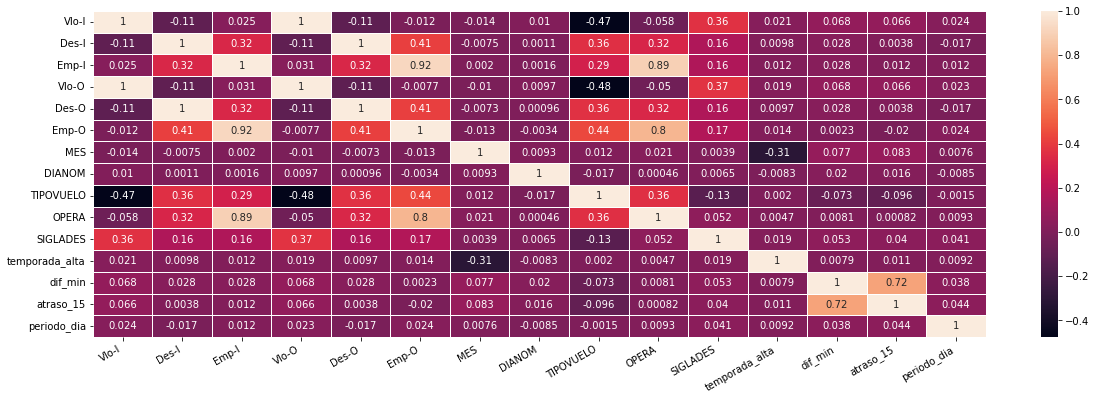

In [92]:
# La matriz de correlación CON Encoding luciría así:

df_corrmatrix = df.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(df_corrmatrix, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Observamos:

1. Mucho más completa que la anterior luego del LabelEncoding.
2. Recordemos que dropeamos SIGLAORI, ORI-I, ORI-O puesto que tienen 1 sólo valor y no aportan.
3. También ignoremos, como vimos antes, dif_min porque lo usamos para construir atraso_15.
4. Miremos la correlación entre atraso_15 (la que nos importa) y TIPOVUELO, hay una correlación inversa (-0.096), pero tiene poca fuerza.
5. Entre atraso_15 (la que nos importa) y MES, hay una correlación directa (0.083), pero tiene poca fuerza.
6. Entre atraso_15 (la que nos importa) y Vlo-O, hay una correlación directa (0.066), pero tiene poca fuerza.
7. Aquí poco y mucho es arbitrario así que hay que medirlo.

Las demás correlaciones fuertes entre features son triviales por ej:
1. SIGLADES con Vlo-I (0.36) porque el vuelo programado ya contiene implícito el destino.
2. OPERA con TIPOVUELO (0.36), porque naturalmente ciertas aerolíneas se especializan en vuelos internacionales y otras en vuelos nacionales.
3. La EMP-I con OPERA (0.89), es decir, la aerolinea con el operador son prácticamente lo mismo, por eso fuerte relación.

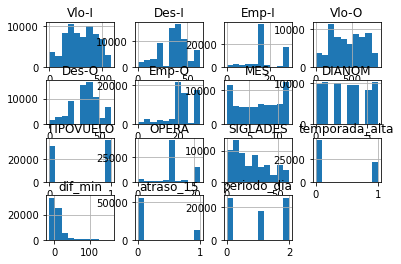

In [93]:
# Miremos los histogramas de todas columnas hasta ahora.
hist = df.hist()

<AxesSubplot:>

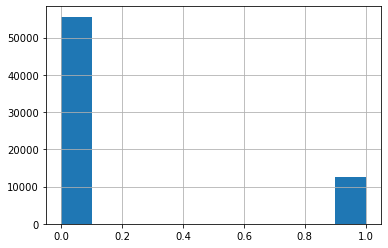

In [94]:
# Miremos de cerca los más interesantes.
df['atraso_15'].hist()

<AxesSubplot:>

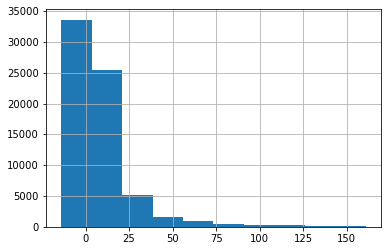

In [95]:
df['dif_min'].hist() # 15 min de atraso parece un buen corte para la definición.

<AxesSubplot:>

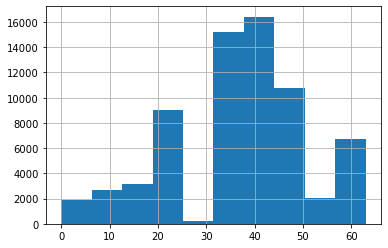

In [96]:
df['Des-I'].hist()

<AxesSubplot:>

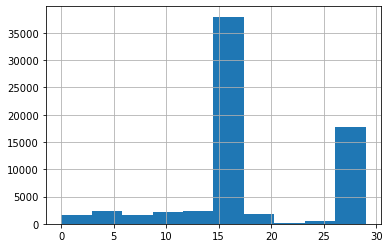

In [97]:
df['Emp-I'].hist()

<AxesSubplot:>

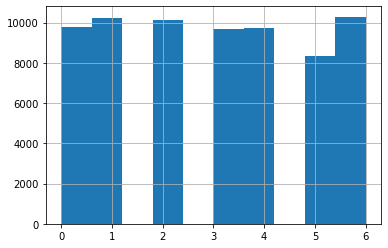

In [98]:
df['DIANOM'].hist()

<AxesSubplot:>

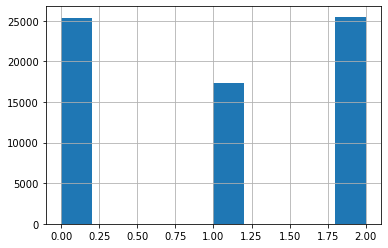

In [99]:
df['periodo_dia'].hist() # claro es una categórica, pero se ve que en las tardes hay menos vuelos que en la mañana y noche.

In [100]:
# definimos un boxplot para mirar graficamente.
# bp1 = le_df[['DIANOM']]
# sns.boxplot(x="variable", y="value", data=pd.melt(bp1)) # melt despivotea
# plt.show()

In [101]:
# mirando el boxplot y su distribución
# sns.violinplot(y=le_df["DIANOM"])

In [102]:
df.head()

Vlo-I  Des-I  Emp-I  Vlo-O  Des-O  Emp-O  MES  DIANOM  TIPOVUELO  OPERA  \
0    219      9      0    318     10      2    1       0          0      5   
1    219      9      0    318     10      2    1       2          0      5   
2    219      9      0    318     10      2    1       3          0      5   
3    219      9      0    318     10      2    1       4          0      5   
4    219      9      0    318     10      2    1       1          0      5   

   SIGLADES  temporada_alta  dif_min  atraso_15  periodo_dia  
0        34               1      3.0          0            1  
1        34               1      9.0          0            1  
2        34               1      9.0          0            1  
3        34               1      3.0          0            1  
4        34               1     -2.0          0            1

## Paso 9: Test & Train

Estamos listos para definir nuestras características (features) y objetivos (targets) en dos datasets separados.
A continuación, dividiremos los datos del dataframe y el target en conjuntos de entrenamiento y conjuntos de prueba. Al dividir el conjunto de datos, mantendremos el 30% de los datos como datos de prueba y el 70% restante como datos de entrenamiento. Esto es arbitrario y la mejor división dependerá de los datos específicos con los que se esté trabajando. El método train_test_split() en scikit-learn se puede usar para dividir los datos:

In [103]:
# quitamo la columna 'atraso_15', esta última es el target.
# Con esto renombramos el dataframe pre-preocesado como: data
data = df.drop(columns=['atraso_15'])

In [104]:
# asignamos la col 'atraso_15' como target en un nuevo data set:
target = df['atraso_15']
#target = pd.DataFrame(data=target) # forzamos a que sea un dataframe de otro modo lo toma como Serie porque tiene una sola col
type(target)

pandas.core.series.Series

In [105]:
# importamos train_test_split para la división
from sklearn.model_selection import train_test_split

In [106]:
# dividimos el data set entre train and test: data_train, data_test, target_train y target_test.
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.30, random_state = 10)

In [107]:
# vemos su largo
len(data_train),len(data_test),len(target_train),len(target_test)

(47744, 20462, 47744, 20462)

In [108]:
# miramos los tipos:
type(data_train),type(data_test),type(target_train),type(target_test)
# como tienen que ser, 2 matrices y 2 vectores, para test y train respectivamente.

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

En la célula anterior, hemos preparado un conjunto de prueba (test) y un conjunto de entrenamiento (train). primero importamos el módulo train_test_split. A continuación, usamos el método train_test_split() para dividir los datos en un conjunto de entrenamiento (data_train,target_train) y un conjunto de prueba (data_test,data_train). El primer argumento del método train_test_split() son las características escogidas, en nuestro caso todas las columnas, el segundo argumento es el objetivo ('atraso_15'). El tercer argumento 'test_size' es el porcentaje de los datos que queremos separar como datos de entrenamiento. En nuestro caso es del 30%, aunque como dije, esto es arbitrario. El cuarto argumento 'random_state' solo asegura que obtengamos resultados reproducibles cada vez. Eso... ahora recién vemos el modelo, démosle.

## Paso 10: Modelo

In [109]:
# posibles modelos a priori dado que la Y (atraso_15) es binaria: Logistic, RandomForest, XGBoosting

In [110]:
# Seguiremos con Logistic Regression

La regresión logística es un algoritmo de clasificación de ML que se utiliza para predecir la probabilidad de una variable dependiente categórica. La variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.). En otras palabras, el modelo de regresión logística predice P(Y=1) en función de X.

En nuestro caso la Y es atraso_15, y modelaremos atraso_15==1 si es que existe un atraso de más de 15 min, ese será nuestro Sí (para no llamarlo éxito porque un atraso es algo negativo xd).

Supuestos:
1. La regresión logística binaria requiere que la variable dependiente sea binaria.
2. Para una regresión binaria, el factor de nivel 1 de la variable dependiente debería representar el resultado deseado.
3. Solo se deben incluir las variables significativas.
4. Las variables independientes deben ser independientes entre sí. Es decir, el modelo debe tener poca o ninguna multicolinealidad.
5. Las variables independientes están linealmente relacionadas con las probabilidades logarítmicas.
6. La regresión logística requiere tamaños de muestra bastante grandes.

Teniendo en cuenta las suposiciones anteriores, veamos nuestro conjunto de datos

In [111]:
# lo necesario:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [112]:
# Miremos nuestro target
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [113]:
count_no_sub = len(df[df['atraso_15']==0])
count_sub = len(df[df['atraso_15']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Porcentaje de No atrasos:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Porcentaje de atrasos:", pct_of_sub*100)

Porcentaje de No atrasos: 81.50602586282731
Porcentaje de atrasos: 18.493974137172682


In [114]:
# Tenemos un problema de clases desbalanceadas.
# Veamos las frecuencias de las features respecto del target.

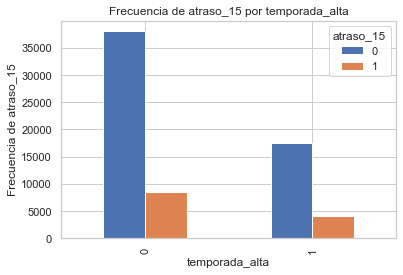

In [115]:
# ¿Es temporada_alta un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['temporada_alta'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de atraso_15 por temporada_alta')
plt.xlabel('temporada_alta')
plt.ylabel('Frecuencia de atraso_15')
plt.savefig('Frecuencia de atraso_15 por temporada_alta')

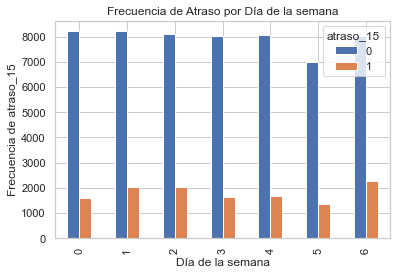

In [116]:
# ¿Es DIANOM un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['DIANOM'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de Atraso por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de atraso_15')
plt.savefig('Frecuencia de Atraso por Día de la semana')

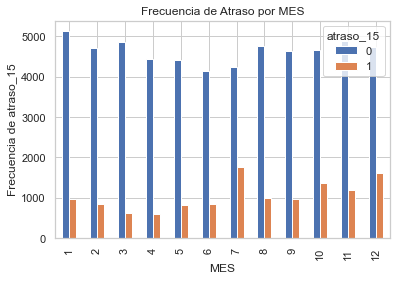

In [117]:
# ¿Es MES un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['MES'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de Atraso por MES')
plt.xlabel('MES')
plt.ylabel('Frecuencia de atraso_15')
plt.savefig('Frecuencia de Atraso por MES')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vlo-I           68206 non-null  int32  
 1   Des-I           68206 non-null  int32  
 2   Emp-I           68206 non-null  int32  
 3   Vlo-O           68206 non-null  int32  
 4   Des-O           68206 non-null  int32  
 5   Emp-O           68206 non-null  int32  
 6   MES             68206 non-null  int64  
 7   DIANOM          68206 non-null  int32  
 8   TIPOVUELO       68206 non-null  int32  
 9   OPERA           68206 non-null  int32  
 10  SIGLADES        68206 non-null  int32  
 11  temporada_alta  68206 non-null  int32  
 12  dif_min         68206 non-null  float64
 13  atraso_15       68206 non-null  int32  
 14  periodo_dia     68206 non-null  int32  
dtypes: float64(1), int32(13), int64(1)
memory usage: 4.4 MB


In [119]:
# Importante, volveremos a antes del paso 7 Label Encoding, porque sirvió para graficar,
# pero ahora quiero el dataset original, esto porque se me ocurrió una forma más rápida de hacer el encoding,
# igualmente sirve el paso 7 para explicar lo que se está haciendo.

# Nos vamos a devolver con f^(-1)
# Para devolvernos sólo tenemos que usar la función y darle 2 argumentos:
# El dataframe convertido (le_df) y el diccionario del LE (le_dict).

numbers_to_text(le_df, le_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vlo-I           68206 non-null  object 
 1   Des-I           68206 non-null  object 
 2   Emp-I           68206 non-null  object 
 3   Vlo-O           68206 non-null  object 
 4   Des-O           68206 non-null  object 
 5   Emp-O           68206 non-null  object 
 6   MES             68206 non-null  int64  
 7   DIANOM          68206 non-null  object 
 8   TIPOVUELO       68206 non-null  object 
 9   OPERA           68206 non-null  object 
 10  SIGLADES        68206 non-null  object 
 11  temporada_alta  68206 non-null  int32  
 12  dif_min         68206 non-null  float64
 13  atraso_15       68206 non-null  int32  
 14  periodo_dia     68206 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(11)
memory usage: 7.3+ MB


In [120]:
# re-definimos el dataset con las features en df_res y el target en y_res

y_res = df['atraso_15']
df_res = df.drop(columns=['atraso_15'])

In [121]:
# Recordemos qué tan imbalanceado está.
classes_count = y_res.value_counts()
classes_count

0    55592
1    12614
Name: atraso_15, dtype: int64

Realizaremos una evaluación de validación cruzada para obtener una estimación del score de la prueba.

De base podríamos usar un clasificador que siempre predecirá la clase mayoritaria independientemente de las características que le demos proporcionadas.

In [122]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)
print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")

Accuracy score of a dummy classifier: 0.815


En lugar de usar accuracy (precisión), podemos usar balanced_accuracy (precisión balanceada) que considera el problema del equilibrio.

In [123]:
print(
    f"Balanced accuracy score of a dummy classifier: "
    f"{cv_result['test_balanced_accuracy'].mean():.3f}"
)

Balanced accuracy score of a dummy classifier: 0.500


Usaremos un diccionario y una lista para almacenar continuamente los resultados de nuestros experimentos y mostrarlos en un super dashboard de 2x2 de pandas.

In [124]:
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

# Partamos con un Dummy

Antes de entrenar un modelo ML, podemos almacenar los resultados obtenido con nuestra :class:`~sklearn.dummy.DummyClassifier`.

In [125]:
import pandas as pd

index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier   0.81506                0.5

# Clasificador lineal

Crearemos un pipeline de ML utilizando un clasificador `~sklearn.linear_model.LogisticRegression`. Esto porqe necesitaremos codificar en caliente las columnas categóricas y estandarizar las columnas numéricas antes de meter los datos en al clasificador `~sklearn.linear_model.LogisticRegression`.

Primero, definimos los pipelines, numéricos y categóricos.

In [126]:
# Volver al df orginal, anterior al Label Encoder, pq lo haremos con OneHotEncoder
# pues la versión está estable y además SMOTE me dio errores de versión.

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder # Sí, mejor el OHE no más
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

Luego, podemos crear un preprocesador que enviará las columnas categóricas al pipeline categóico y las con numeritos al pipeline de numeritos.

In [128]:
df.head()

Vlo-I Des-I Emp-I Vlo-O Des-O Emp-O  MES     DIANOM TIPOVUELO  \
0   226  KMIA   AAL   226  KMIA   AAL    1    Domingo         I   
1   226  KMIA   AAL   226  KMIA   AAL    1      Lunes         I   
2   226  KMIA   AAL   226  KMIA   AAL    1     Martes         I   
3   226  KMIA   AAL   226  KMIA   AAL    1  Miercoles         I   
4   226  KMIA   AAL   226  KMIA   AAL    1     Jueves         I   

               OPERA SIGLADES  temporada_alta  dif_min  atraso_15 periodo_dia  
0  American Airlines    Miami               1      3.0          0       noche  
1  American Airlines    Miami               1      9.0          0       noche  
2  American Airlines    Miami               1      9.0          0       noche  
3  American Airlines    Miami               1      3.0          0       noche  
4  American Airlines    Miami               1     -2.0          0       noche

In [129]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Vlo-I           68206 non-null  object 
 1   Des-I           68206 non-null  object 
 2   Emp-I           68206 non-null  object 
 3   Vlo-O           68206 non-null  object 
 4   Des-O           68206 non-null  object 
 5   Emp-O           68206 non-null  object 
 6   MES             68206 non-null  int64  
 7   DIANOM          68206 non-null  object 
 8   TIPOVUELO       68206 non-null  object 
 9   OPERA           68206 non-null  object 
 10  SIGLADES        68206 non-null  object 
 11  temporada_alta  68206 non-null  int32  
 12  dif_min         68206 non-null  float64
 13  periodo_dia     68206 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 7.0+ MB


Categórica importantes son:

0. atraso_15 (target)
1. temporada_alta
2. periodo_dia
3. DIANOM
4. OPERA
5. TIPOVUELO
6. DIANOM
7. MES (porque puedo, esto era porque DIA ya está en periodo_dia y AÑO no sirve pq tenemos data de 2017)

Metemos estas? # iteremos una con estas y otra sin.
Vlo-I
Des-I
Emp-I
Vlo-O
Des-O
Emp-O

In [130]:
print(df_res.nunique())

Vlo-I             584
Des-I              64
Emp-I              30
Vlo-O             861
Des-O              63
Emp-O              32
MES                12
DIANOM              7
TIPOVUELO           2
OPERA              23
SIGLADES           62
temporada_alta      2
dif_min           176
periodo_dia         3
dtype: int64


In [131]:
# Pasamos a categórica las features con menos de 862 valores únicos. Arbitrariamente, vamos probando.
cols_to_exclude = ['dif_min'] # este tiene que ser numérico
for col in df_res.columns:
    if df_res[col].nunique() < 862 and col not in cols_to_exclude:
        df_res[col] = df_res[col].astype('category')
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Vlo-I           68206 non-null  category
 1   Des-I           68206 non-null  category
 2   Emp-I           68206 non-null  category
 3   Vlo-O           68206 non-null  category
 4   Des-O           68206 non-null  category
 5   Emp-O           68206 non-null  category
 6   MES             68206 non-null  category
 7   DIANOM          68206 non-null  category
 8   TIPOVUELO       68206 non-null  category
 9   OPERA           68206 non-null  category
 10  SIGLADES        68206 non-null  category
 11  temporada_alta  68206 non-null  category
 12  dif_min         68206 non-null  float64 
 13  periodo_dia     68206 non-null  category
dtypes: category(13), float64(1)
memory usage: 1.6 MB


In [132]:
# Está Ok

In [133]:
y_res.dtype
# no es categórica

dtype('int32')

In [134]:
y_res = y_res.astype('category')
y_res.dtype
# Ahora sí

CategoricalDtype(categories=[0, 1], ordered=False)

In [135]:
# Ver que el 1 sea el atraso, y el 0 el no-atraso.
y_res.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: atraso_15, dtype: category
Categories (2, int64): [0, 1]

In [136]:
# armamos los pipelines
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

Finalmente, conectamos nuestro bonito preprocesador con `~sklearn.linear_model.LogisticRegression`.

Ahora podemos evaluar nuestro modelo.

In [137]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

In [138]:
index += ["Logistic regression"] # agregamos la RL a nuestro super dashboard de 2x2
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring) # validación cruzadaaa

# colgamos resultados de precisión sin balancear
scores["Accuracy"].append(cv_result["test_accuracy"].mean()) 

# colgamos resultados de precisión CON balancear
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier     0.815060           0.500000
Logistic regression  0.983726           0.972241

Ahora, veamos un enfoque diferente para mejorar un poquito el rendimiento del modelo.

Usaremos `class_weight`

Se sabe que la mayoría de los modelos en `scikit-learn` tienen un parámetro `class_weight`. Este parámetro afectará el cálculo de la pérdida en el modelo lineal para penalizar de manera diferente una falsa clasificación de la clase minoritaria y mayoritaria. podemos establecer `class_weight="balanced"` tal que el peso aplicado es inversamente proporcional a la frecuencia de clase. Probamos esta parametrización en nuestro modelito lineal.

In [139]:
lr_clf.set_params(logisticregression__class_weight="balanced")

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier                                 0.815060           0.500000
Logistic regression                              0.983726           0.972241
Logistic regression with balanced class weights  0.980573           0.977233

Muestreamos el conjunto de entrenamiento de nuevo, durante el aprendizaje.

Otra forma es volver a muestrear el conjunto de entrenamiento submuestreando o
sobremuestreando algunas de las muestras. `imbalanced-learn` proporciona algunas muestras
para hacer tal procesamiento.

In [140]:
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)

In [141]:
index += ["Submuestreo + Logistic regression"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier                                 0.815060           0.500000
Logistic regression                              0.983726           0.972241
Logistic regression with balanced class weights  0.980573           0.977233
Submuestreo + Logistic regression                0.975779           0.973648

# Probabilidad de Atraso

La probabilidad de atraso entonces la podemos rescatar del modeloe:

"Logistic regression with balanced class weights"

o bien,

Modelo de regresión logística con clase balanceada por pesos.

In [142]:
from sklearn.model_selection import cross_val_predict
proba = cross_val_predict(lr_clf, df_res, y_res, method='predict_proba') #
# model = lr_clf
# X = df_res
# y = y_res

In [143]:
with np.printoptions(threshold=np.inf):
    print(proba)

[[9.99999071e-01 9.28950212e-07]
 [9.98938921e-01 1.06107871e-03]
 [9.99077036e-01 9.22963603e-04]
 [9.99999100e-01 8.99765072e-07]
 [9.99999995e-01 4.56464040e-09]
 [4.22177848e-10 1.00000000e+00]
 [1.00000000e+00 1.21659134e-10]
 [1.00000000e+00 1.02612692e-10]
 [5.03375119e-13 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.27864163e-12]
 [7.60081526e-01 2.39918474e-01]
 [1.00000000e+00 1.01891938e-11]
 [1.00000000e+00 3.79965083e-10]
 [1.00000000e+00 1.36216359e-13]
 [1.00000000e+00 1.04458043e-12]
 [1.00000000e+00 1.27864163e-12]
 [1.00000000e+00 4.36144398e-14]
 [5.89099863e-01 4.10900137e-01]
 [9.99999997e-01 3.35727472e-09]
 [9.99999722e-01 2.77817484e-07]
 [9.99766982e-01 2.33018308e-04]
 [1.00000000e+00 1.30610036e-10]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.06050228e-10]
 [9.99999973e-01 2.65804792e-08]
 [4.21929733e-06 9.99995781e-01]
 [9.99999999e-01 9.34899324e-10]
 [1.00000000e+00 8.66372479e-11]
 [9.99999621e-01 3.78590029e-07]
 [9.999997

In [144]:
# Veamos la Confucio Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(lr_clf, df_res, y_res, cv=10)
conf_mat = confusion_matrix(y_res, y_pred)

In [145]:
print(conf_mat)

[[54199  1393]
 [  279 12335]]


In [146]:
with np.printoptions(threshold=np.inf):
    print(y_pred)

[0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [147]:
df['atraso_15'].head(50)

0     0
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    1
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: atraso_15, dtype: int32

In [148]:
# revisamos la columna para corroborar.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(proba)

[[9.99999071e-01 9.28950212e-07]
 [9.98938921e-01 1.06107871e-03]
 [9.99077036e-01 9.22963603e-04]
 ...
 [1.79856130e-13 1.00000000e+00]
 [7.69845248e-01 2.30154752e-01]
 [9.97150657e-01 2.84934274e-03]]


Sugerencias a posteriori (aka trabajo futuro):

Aplicar un submuestreador aleatorio antes del entrenamiento del modelo lineal, permite no enfocarse en la clase mayoritaria a costa de cometer más errores con muestras en la clase mayoritaria (o sea, disminuir precisión).

Podríamos aplicar cualquier tipo de muestreador y encontrar cuál de ellos funciona mejor en el dataset actual.
En vez de eso, otra forma podría ser mediante el uso de clasificadores que se aplicarán al muestreo interno.

Ejemplos de esto son el uso de algoritmos de balance específicos desde `imbalanced-learn`

Por otro lado, podríamos ir agregando modelos, el siguiente que sugeriría es RandomForest, si bien los árboles de decisión son fáciles de interpretar, RandomForest no tanto, pero hay varias maneras de codear un RandomForest para mostrar el orden de importancia de las features respecto del target junto a todo el poder de ese algorimo.

# NOTAS

### Over-sampling usando SMOTE
Con nuestros datos de entrenamiento creados, aumentaremos la muestra de atrasos utilizando el algoritmo SMOTE (técnica de sobremuestreo de minorías sintéticas). A un alto nivel, SMOTE:

1. Funciona creando muestras sintéticas de la clase menor (Atrasos==1) en lugar de crear copias.
2. Eligiendo al azar uno de los k-vecinos más cercanos y usándolo para crear nuevas observaciones similares, pero modificadas al azar.

Vamos a implementar SMOTE:

In [149]:
# data_final = df
# data_final.head()

In [150]:
# Warning, imblearn no funciona si no está instalado en un entorno, el revisor no podrá ejecutar todo el notebook.
# Buscar alternativa para tratar clases balanceadas.

#from collections import Counter
#from sklearn.datasets import make_classification
#from imblearn.over_sampling import SMOTE 

#!pip install imbalanced-learn==0.6.0
#!pip install scikit-learn==0.22.1
# check version number

# print(imblearn.__version__)

In [151]:

# X = data_final.loc[:, data_final.columns != 'atraso_15']
# y = data_final.loc[:, data_final.columns == 'atraso_15']


In [152]:
'''
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
'''

'\nfrom imblearn.over_sampling import SMOTE\nos = SMOTE(random_state=0)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\ncolumns = X_train.columns\nos_data_X,os_data_y=os.fit_sample(X_train, y_train)\nos_data_X = pd.DataFrame(data=os_data_X,columns=columns )\nos_data_y= pd.DataFrame(data=os_data_y,columns=[\'y\'])\n# we can Check the numbers of our data\nprint("length of oversampled data is ",len(os_data_X))\nprint("Number of no subscription in oversampled data",len(os_data_y[os_data_y[\'y\']==0]))\nprint("Number of subscription",len(os_data_y[os_data_y[\'y\']==1]))\nprint("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y[\'y\']==0])/len(os_data_X))\nprint("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y[\'y\']==1])/len(os_data_X))\n'

In [153]:
'''
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
'''

"\ndata_final_vars=data_final.columns.values.tolist()\ny=['y']\nX=[i for i in data_final_vars if i not in y]\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nlogreg = LogisticRegression()\nrfe = RFE(logreg, 20)\nrfe = rfe.fit(os_data_X, os_data_y.values.ravel())\nprint(rfe.support_)\nprint(rfe.ranking_)\n"